In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

# --- CONFIGURAÇÕES DE IDENTIDADE VISUAL (PALETA GRAN) ---
COR_AZUL_PRINCIPAL = "#0D134C"
COR_VERMELHO = "#DD303E"
COR_PRETO = "#000000"
COR_BRANCO = "#FFFFFF"
FUNDO_EIXOS = "#F9F9F9"

# Configurações de Tipografia
FONT_LABEL = 20
FONT_TICK = 14
FONT_SUBFIGURE = 26

# Definição do tema Seaborn para fundo limpo
sns.set_theme(style="whitegrid", rc={"axes.facecolor": FUNDO_EIXOS})

# Fixando a semente (Boas práticas para dados sintéticos)
np.random.seed(28)

### Visualização do Intervalo Interquartil ($IQR$) e Outliers

Para compreendermos o cálculo dos quartis, precisamos de uma premissa básica: **os dados devem estar ordenados**. 

Nesta visualização utilizaremos um conjunto de dados sintético criado especificamente com um **outlier extremo** (o valor 150). O objetivo é observar como a organização da lista revela os limites de distribuição de 25% ($Q_1$) e 75% ($Q_3$), e como o cálculo da distância entre eles evidencia o comportamento anômalo do nosso outlier.

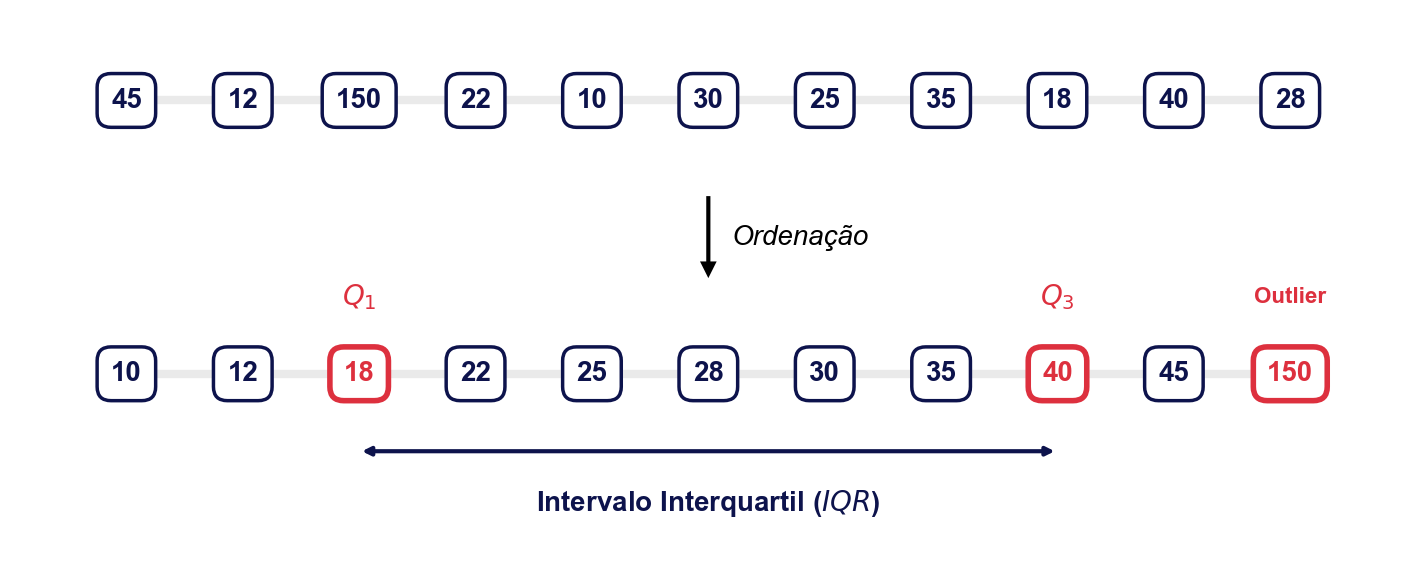

In [9]:
# 1. Criação dos dados sintéticos didáticos com Outlier intencional (n=11)
dados_originais = [45, 12, 150, 22, 10, 30, 25, 35, 18, 40, 28]
dados_ordenados = sorted(dados_originais)

# Para 11 elementos: Q1 é o 3º elemento (índice 2) e Q3 é o 9º elemento (índice 8)
idx_q1 = 2
idx_q3 = 8
idx_outlier = 10

# 2. Configuração do plot (Figura mais larga e mais "baixa" para remover o excesso vertical)
fig, ax = plt.subplots(figsize=(14, 5.5))

# Ajuste matemático dos limites para garantir margens superior e inferior perfeitamente iguais
# O elemento mais alto está em Y=0.85 e o mais baixo em Y=0.0. 
# Limites de -0.15 a 1.05 criam uma margem de segurança exata de 0.15 para ambos os lados.
ax.set_xlim(-1, 11)
ax.set_ylim(-0.15, 1.05)
ax.axis('off')

# Linhas de fundo (aumentamos a espessura para acompanhar o novo tamanho)
ax.plot([0, len(dados_originais)-1], [0.85, 0.85], color='#EAEAEA', lw=6, zorder=0)
ax.plot([0, len(dados_originais)-1], [0.25, 0.25], color='#EAEAEA', lw=6, zorder=0)

# 3. Desenho da Lista Original (Linha superior)
for i, val in enumerate(dados_originais):
    # Utilizamos FONT_LABEL (20) para os números ficarem bem grandes e legíveis
    ax.text(i, 0.85, str(val), ha='center', va='center', fontsize=FONT_LABEL, 
            fontweight='bold', color=COR_AZUL_PRINCIPAL, zorder=2,
            bbox=dict(boxstyle='round,pad=0.5', fc=COR_BRANCO, ec=COR_AZUL_PRINCIPAL, lw=2.5))

# Seta indicadora de ordenação (Centro) com texto lateral aumentado
ax.annotate('', xy=(5, 0.45), xytext=(5, 0.65),
            arrowprops=dict(facecolor=COR_PRETO, shrink=0.05, width=3, headwidth=12, edgecolor='none'))
ax.text(5.2, 0.55, "Ordenação", fontsize=FONT_LABEL, fontstyle='italic', color=COR_PRETO, va='center')

# 4. Desenho da Lista Ordenada e Destaques (Linha inferior)
for i, val in enumerate(dados_ordenados):
    cor_borda = COR_AZUL_PRINCIPAL
    cor_texto = COR_AZUL_PRINCIPAL
    espessura_borda = 2.5
    
    # Regras de destaque para Q1, Q3 e Outlier (Aumentamos a fonte dos marcadores)
    if i == idx_q1:
        cor_borda = COR_VERMELHO
        cor_texto = COR_VERMELHO
        espessura_borda = 4
        ax.text(i, 0.42, "$Q_1$", ha='center', va='center', fontsize=FONT_LABEL, fontweight='bold', color=COR_VERMELHO)
    elif i == idx_q3:
        cor_borda = COR_VERMELHO
        cor_texto = COR_VERMELHO
        espessura_borda = 4
        ax.text(i, 0.42, "$Q_3$", ha='center', va='center', fontsize=FONT_LABEL, fontweight='bold', color=COR_VERMELHO)
    elif i == idx_outlier:
        cor_borda = COR_VERMELHO
        cor_texto = COR_VERMELHO
        espessura_borda = 4
        ax.text(i, 0.42, "Outlier", ha='center', va='center', fontsize=16, fontweight='bold', color=COR_VERMELHO)

    # Plotagem do nó
    ax.text(i, 0.25, str(val), ha='center', va='center', fontsize=FONT_LABEL, 
            fontweight='bold', color=cor_texto, zorder=2,
            bbox=dict(boxstyle='round,pad=0.5', fc=COR_BRANCO, ec=cor_borda, lw=espessura_borda))

# 5. Colchete indicativo do Intervalo Interquartil (IQR) aumentado
ax.annotate('', xy=(idx_q1, 0.08), xytext=(idx_q3, 0.08),
            arrowprops=dict(arrowstyle='<|-|>', color=COR_AZUL_PRINCIPAL, lw=3))
ax.text((idx_q1 + idx_q3) / 2, 0.0, 'Intervalo Interquartil ($IQR$)', 
        ha='center', va='top', fontsize=FONT_LABEL, color=COR_AZUL_PRINCIPAL, fontweight='bold')

# 6. Ajustes finais e Exportação
# Utilizamos pad=0.1 para que o corte nas bordas seja rente e mantenha a simetria que calculamos no ylim
plt.tight_layout(pad=0.1) 

caminho_save = os.path.join('..', 'outputs', 'figures', 'aula_04')
os.makedirs(caminho_save, exist_ok=True)
plt.savefig(os.path.join(caminho_save, '01_iqr_outlier_sintetico.png'), dpi=300)

plt.show()